## Assignment

The goal of this project is to understand this traffic better, in particular the volume and distribution of events, and to develop ideas how to increase the links' clickrates. With that in mind, please analyze the data using the Python libraries Pandas and SciPy where indicated, providing answers to the presented questions:

1. How many total pageview events did the links in the provided dataset receive in the full period, how many per day?
2. What about the other recorded events?
3. Which countries did the pageviews come from?
4. What was the overall click rate (clicks/pageviews)?
5. How does the clickrate distribute across different links?
6. Is there any correlation between clicks and previews on a link? Is it significant? How large is the effect? Make sure to at least test for potential linear as well as categorical (think binary) relationships between both variables.

### Importing necessary libraries

In [21]:
import pandas as pd
import numpy as np
import phik
from scipy import stats

import matplotlib.pylab as plt
import seaborn as sns

### Data importing and EDA

In [3]:
# import csv-file
df = pd.read_csv('traffic.csv')

In [4]:
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [108]:
# Let's look at main dataset features: shape, NaNs
df.shape

(226278, 9)

In [117]:
# Let's look on the proportion of NaN to the df length
(df.isna().sum() / df.shape[0]).sort_values(ascending=False)

isrc       0.031470
artist     0.000164
country    0.000049
city       0.000049
album      0.000022
track      0.000022
event      0.000000
date       0.000000
linkid     0.000000
dtype: float64

The biggest proportion is in the 'isrc' column ~3%. But this column is not important for our analysis now
Other columns that have several amount of NaN will not spoil our analysis because the amount of these NaNs is statistically insignificant (no more than 0.01% of the data)

,index,event
0,pageview,142015
1,click,55732
2,preview,28531


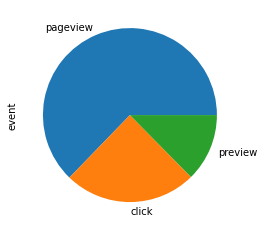

In [118]:
# let's look how events are distributed
df['event'].value_counts().plot(kind='pie')
df['event'].value_counts().reset_index()

Most events are pageviews

In [119]:
# Let's look at min and max date
print(f'Min date: {df.date.min()}; Max date: {df.date.max()}')

Min date: 2021-08-19; Max date: 2021-08-25


In [120]:
# Also it may be usefull to know how events were distributed over the time
# First we will create a df for the graph
event_by_date = df.groupby(['date', 'event'], as_index=False) \
                  .country.count() \
                  .pivot(index='date', columns='event', values='country').reset_index()

event_by_date

event,date,click,pageview,preview
0,2021-08-19,9207,22366,3788
1,2021-08-20,8508,21382,4222
2,2021-08-21,8071,21349,4663
3,2021-08-22,7854,20430,4349
4,2021-08-23,7314,18645,3846
5,2021-08-24,7301,18685,3840
6,2021-08-25,7476,19149,3822


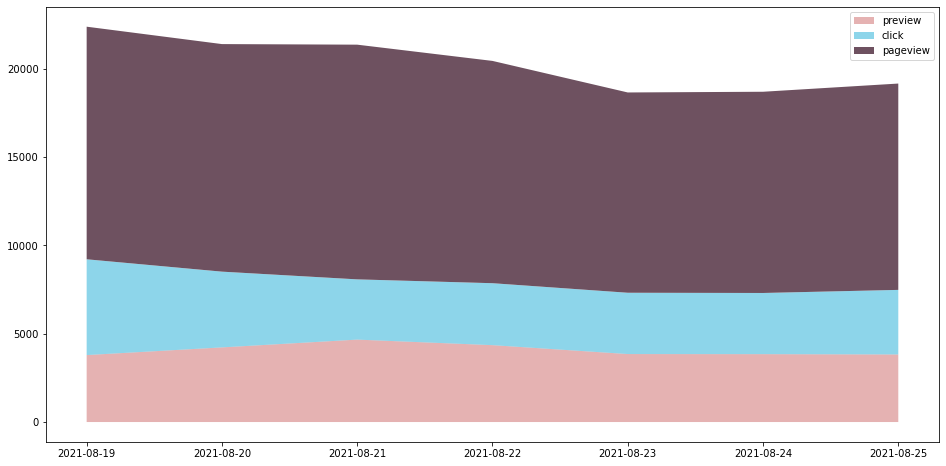

In [121]:
# Then plot stacked area plot
y = np.array([list(event_by_date['preview']),
              list(event_by_date['click']),
              list(event_by_date['pageview'])])

x = np.array(list(event_by_date['date']))

fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(111)  

ax1.fill_between(x, 0, y[0,:], facecolor="#CC6666", alpha=.5, label="preview")
ax1.fill_between(x, y[0,:], y[1,:], facecolor="#1DACD6", alpha=.5, label="click")
ax1.fill_between(x, y[1,:], y[2,:], facecolor="#6E5160", label="pageview")

plt.legend(loc="upper right")
plt.show()

Over the time the biggest fall was in the pageviews

In [135]:
# Last one - what are the top-10 artists
df['artist'].value_counts(normalize=True).head(10)

Tesher                                                          0.180520
Anne-Marie                                                      0.047074
Tundra Beats                                                    0.043100
Surf Mesa, Emilee                                               0.033296
DMNDS, Strange Fruits Music, Fallen Roses, Lujavo, Nito-Onna    0.024363
Reyanna Maria                                                   0.024032
Shawn Mendes, Tainy                                             0.023908
50 Cent, Olivia                                                 0.023722
Roddy Ricch                                                     0.022511
Olivia Rodrigo                                                  0.018189
Name: artist, dtype: float64

Here an interesting thing is that the first place (Tesher) takes ~5 times more events than the artist on the second place (Anne-marie)

### 1. How many total pageview events did the links in the provided dataset receive in the full period, how many per day?

In [143]:
# The total pageviews during the period
df.query('event == "pageview"')['event'].count()

142015

In [148]:
# Pageviews per day
df.query('event == "pageview"').groupby('date')['event'].count()

date
2021-08-19    22366
2021-08-20    21382
2021-08-21    21349
2021-08-22    20430
2021-08-23    18646
2021-08-24    18693
2021-08-25    19149
Name: event, dtype: int64

In [151]:
# Also it may be important to see on the data without full duplicates
df.drop_duplicates().query('event == "pageview"').groupby('date')['event'].count()

date
2021-08-19    13006
2021-08-20    11088
2021-08-21     9939
2021-08-22     9982
2021-08-23     9722
2021-08-24     9705
2021-08-25     9918
Name: event, dtype: int64

~ The data pattern looks same, but twice as smaller in terms of recorded events

### 2. What about the other recorded events?

In [157]:
df.query('event != "pageview"').groupby('event', as_index=False).date.count()

,event,date
0,click,55732
1,preview,28531


In [160]:
print('Event type: click')
print(df.query('event == "click"').groupby('date')['event'].count())
print('\nEvent type: preview')
print(df.query('event == "preview"').groupby('date')['event'].count())

Event type: click
date
2021-08-19    9207
2021-08-20    8508
2021-08-21    8071
2021-08-22    7854
2021-08-23    7315
2021-08-24    7301
2021-08-25    7476
Name: event, dtype: int64

Event type: preview
date
2021-08-19    3788
2021-08-20    4222
2021-08-21    4663
2021-08-22    4349
2021-08-23    3847
2021-08-24    3840
2021-08-25    3822
Name: event, dtype: int64


### 3. Which countries did the pageviews come from?

In [166]:
countries_preview = df.query('event != "pageview"')['country'].value_counts(normalize=True).head(10)

print(countries_preview)
print(f'\nTop-10 countries give: {round(countries_preview.sum()*100,2)}% of traffic')

Saudi Arabia            0.219093
India                   0.186397
United States           0.139080
France                  0.071053
Iraq                    0.039912
Pakistan                0.028863
United Kingdom          0.025219
Germany                 0.019618
United Arab Emirates    0.016223
Kuwait                  0.014467
Name: country, dtype: float64

Top-10 countries give: 75.99% of traffic


### 4. What was the overall click rate (clicks/pageviews)?

In [183]:
overall_clicks = len(df.query('event == "click"')['event'])
overall_pageviews = len(df.query('event == "pageview"')['event'])

print(f'Overall click rate: {round(overall_clicks / overall_pageviews, 2)}')

Overall click rate: 0.39


### 5. How does the clickrate distribute across different links?

That will be harder. First we will count the amount of clicks and views by link. Then we will count the clickrate and make further analysis

In [219]:
# Calculating clicks and views
cnt_by_link = df.groupby(['linkid', 'event'], as_index=False).date.count() \
    .pivot(index='linkid', columns='event', values='date').fillna(0).reset_index()

cnt_by_link.head()

event,linkid,click,pageview,preview
0,00073307-ae96-5089-a117-4783afb42f8e,0.0,2.0,0.0
1,00126b32-0c35-507b-981c-02c80d2aa8e7,2.0,2.0,0.0
2,0018cfff-50a1-5984-9715-01ef2d11a49a,0.0,1.0,0.0
3,0033934b-5d16-5a06-af58-d087bcdd3680,0.0,1.0,0.0
4,0034d6cf-3bd8-5ffe-aafc-b3959fc48608,0.0,1.0,0.0


In [222]:
# Calculating clickrate by link

cnt_by_link['click_rate'] = cnt_by_link['click'] / cnt_by_link['pageview']

In [227]:
cnt_by_link = cnt_by_link.sort_values('click_rate', ascending=False)
cnt_by_link

event,linkid,click,pageview,preview,click_rate
2669,aee2b83d-5f50-4309-9e62-200c404d4751,1.0,0.0,0.0,inf
1280,54166799-1895-4f35-9b2f-b249c2f7a351,1.0,0.0,0.0,inf
3029,c95f1fc1-fab0-4c74-b3f5-52bd3684a713,923.0,10.0,0.0,92.3
792,330773a6-f22a-5c7a-a3e4-7809fe8539b9,3.0,1.0,0.0,3.0
614,27a91fe1-9fc0-5c28-9e9e-19ff0e7357a7,3.0,1.0,0.0,3.0
...,...,...,...,...,...
2457,a05d8198-7043-5b88-b7f5-f0f6b73d07da,0.0,1.0,0.0,0.0
1024,4246b78a-42c3-5f6c-88ac-e3724724f30d,0.0,1.0,0.0,0.0
1008,4168d994-e55d-58c7-8783-8bc0ca30900c,0.0,1.0,0.0,0.0
2516,a42a1db6-652e-522d-bbb5-ec29b37eec06,0.0,1.0,0.0,0.0


There are 3 outliers.  
2 have infinite click rate - that's look like a mistake, because we received one click without being on a page, we will remove these two rows in order two have more valid results.  
The third one is also extremely suspecious, looks like bot attack or smth like that

In [229]:
# First let's remove 2 infinite results
cnt_by_link = cnt_by_link.query('click_rate < 100')

In [240]:
# Examine clicks of link c95f1fc1-fab0-4c74-b3f5-52bd3684a713
outlier = df.query('linkid == "c95f1fc1-fab0-4c74-b3f5-52bd3684a713" and event != "preview"')
outlier.head()

,event,date,country,city,artist,album,track,isrc,linkid
91,click,2021-08-23,India,Ludhiana,Sidhu Moose Wala,Akhian,Akhian,QZQLR2005915,c95f1fc1-fab0-4c74-b3f5-52bd3684a713
92,click,2021-08-23,India,Ludhiana,Sidhu Moose Wala,Akhian,Akhian,QZQLR2005915,c95f1fc1-fab0-4c74-b3f5-52bd3684a713
105,click,2021-08-23,Pakistan,Faisalabad,Sidhu Moose Wala,Akhian,Akhian,QZQLR2005915,c95f1fc1-fab0-4c74-b3f5-52bd3684a713
277,click,2021-08-20,Pakistan,Multan,Sidhu Moose Wala,Akhian,Akhian,QZQLR2005915,c95f1fc1-fab0-4c74-b3f5-52bd3684a713
335,click,2021-08-21,India,Gurgaon,Sidhu Moose Wala,Akhian,Akhian,QZQLR2005915,c95f1fc1-fab0-4c74-b3f5-52bd3684a713


In [241]:
outlier.groupby(['date', 'event']).linkid.count()

date        event   
2021-08-19  click       177
            pageview      1
2021-08-20  click       110
            pageview      1
2021-08-21  click       118
2021-08-22  click       154
2021-08-23  click       100
2021-08-24  click       133
            pageview      3
2021-08-25  click       131
            pageview      5
Name: linkid, dtype: int64

We see that 1 view create more than 100 clicks, looks like an error in data, moreover there are three dates without even views but with >100 clicks.
This row I will also remove from the data

In [242]:
cnt_by_link = cnt_by_link[1:]
cnt_by_link.head()

event,linkid,click,pageview,preview,click_rate
792,330773a6-f22a-5c7a-a3e4-7809fe8539b9,3.0,1.0,0.0,3.0
614,27a91fe1-9fc0-5c28-9e9e-19ff0e7357a7,3.0,1.0,0.0,3.0
956,3e7fb196-61dc-4d8e-b296-925e9c9c778e,2.0,1.0,0.0,2.0
299,132c744a-d87b-5ed6-aff2-d9b8c718a4ea,2.0,1.0,0.0,2.0
3003,c722cabc-3e9b-5ab5-9243-c0dc23524e42,2.0,1.0,0.0,2.0


<AxesSubplot:>

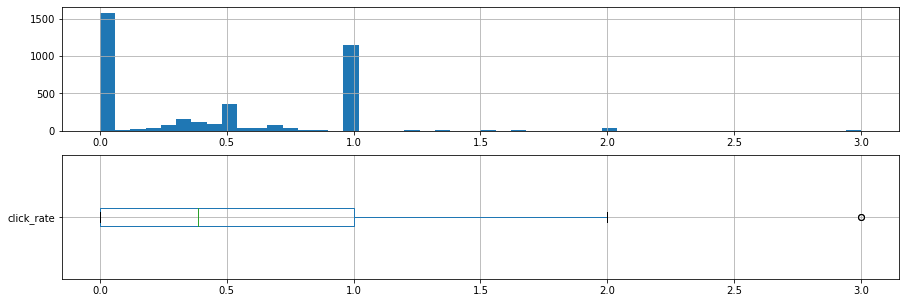

In [256]:
# Let's plot the graphs
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 5))

cnt_by_link['click_rate'].hist(bins=50, ax=ax[0])
cnt_by_link.boxplot(column='click_rate', vert=False,ax=ax[1])

Main conclusions are:
- 3 peaks - 0, 0.5, 1
- several outliers up to click rate == 3
- if we will remove outliers and values at 0 and 1 distribution will be close to normal

<AxesSubplot:>

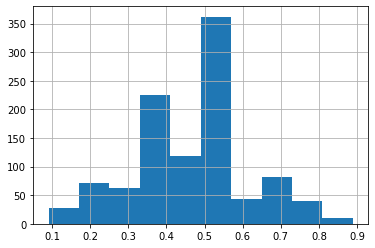

In [267]:
# graph without outliers, zeros and ones
cnt_by_link.query('click_rate > 0 and click_rate < 1')['click_rate'].hist()

### 6. Is there any correlation between clicks and previews on a link? Is it significant? How large is the effect? Make sure to at least test for potential linear as well as categorical (think binary) relationships between both variables

<AxesSubplot:xlabel='preview', ylabel='click'>

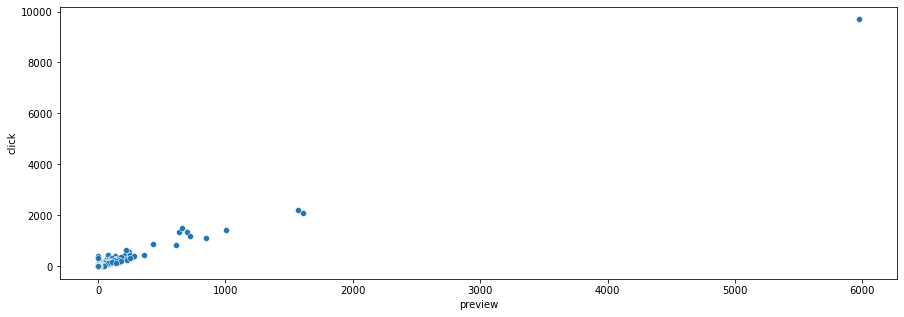

In [282]:
# let's plot the data first and see the distribuion on the scatterplot
fig = plt.figure(figsize=(15,5))

sns.scatterplot(data=cnt_by_link, x="preview", y="click")

Not the perfect one, let's add log to our data in order to receive better visualization of this correlation

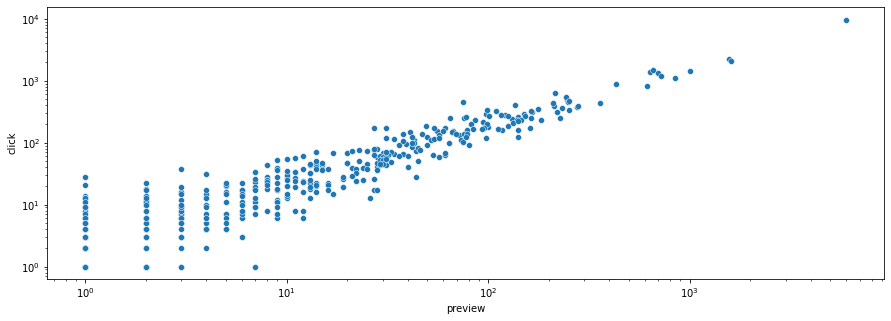

In [275]:
fig = plt.figure(figsize=(15,5))

sns.scatterplot(data=cnt_by_link, x="preview", y="click")
plt.xscale('log')
plt.yscale('log')

Looks like that there is a positive correcaltion between these two veriables. Let's count the correlation coefficient

In [285]:
print(f'Correlation coef: {stats.pearsonr(cnt_by_link["preview"], cnt_by_link["click"])[0]}')
print(f'P-value: {stats.pearsonr(cnt_by_link["preview"], cnt_by_link["click"])[1]}')                          

Correlation coef: 0.9921173316434555
P-value: 0.0
